# 1 - Libraries 

In [13]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import matplotlib.pyplot as plt 
from glob import glob

# 2 - Data Path 

In [14]:
train_path = "datasets/Training/"
test_path = "datasets/Test/"

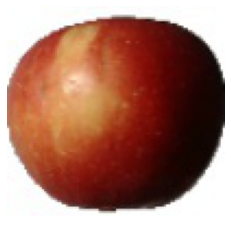

In [15]:
img = load_img(train_path + "Apple Braeburn/0_100.jpg")
plt.imshow(img)
plt.axis("off")
plt.show()

In [16]:
x = img_to_array(img)
print(x.shape)

(100, 100, 3)


In [17]:
className = glob(train_path + "/*")
numberOfClass = len(className)
print("NumberOfClass: ", numberOfClass)

NumberOfClass:  131


# 3 - Model

In [18]:
model = Sequential()
model.add(Conv2D(32,(3,3),input_shape = x.shape))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(1024))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(numberOfClass)) #output
model.add(Activation("softmax"))

In [19]:
model.compile(loss = "categorical_crossentropy",
                optimizer = "rmsprop",
                metrics = ["accuracy"])

batch_size = 32

# 4 - Data Augmentation

In [20]:
train_datagen = ImageDataGenerator(rescale=1./255,
                    shear_range=0.3,
                    horizontal_flip=True,
                    zoom_range=0.3)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_path, 
                                                    target_size = x.shape[:2],
                                                    batch_size = batch_size,
                                                    color_mode = "rgb",
                                                    class_mode = "categorical")

                                                    
test_generator = test_datagen.flow_from_directory(train_path, 
                                                    target_size = x.shape[:2],
                                                    batch_size = batch_size,
                                                    color_mode = "rgb",
                                                    class_mode = "categorical")



Found 67692 images belonging to 131 classes.
Found 67692 images belonging to 131 classes.


# 5 - Model Training

In [21]:
hist = model.fit_generator(generator = train_generator,
                    steps_per_epoch = 1600 // batch_size,
                    epochs = 100,
                    validation_data = test_generator,
                    validation_steps = 800 // batch_size)

Epoch 1/100
50/50 [==============================] - 4s 77ms/step - loss: 4.7335 - accuracy: 0.0306 - val_loss: 4.2534 - val_accuracy: 0.0800
Epoch 2/100
50/50 [==============================] - 4s 73ms/step - loss: 4.0325 - accuracy: 0.0850 - val_loss: 3.3164 - val_accuracy: 0.1875
Epoch 3/100
50/50 [==============================] - 4s 72ms/step - loss: 3.3309 - accuracy: 0.1587 - val_loss: 2.4523 - val_accuracy: 0.3587
Epoch 4/100
50/50 [==============================] - 4s 73ms/step - loss: 2.7442 - accuracy: 0.2694 - val_loss: 2.2138 - val_accuracy: 0.3787
Epoch 5/100
50/50 [==============================] - 4s 77ms/step - loss: 2.2700 - accuracy: 0.3725 - val_loss: 1.9932 - val_accuracy: 0.4325
Epoch 6/100
50/50 [==============================] - 4s 72ms/step - loss: 1.9448 - accuracy: 0.4156 - val_loss: 1.3030 - val_accuracy: 0.6050
Epoch 7/100
50/50 [==============================] - 4s 72ms/step - loss: 1.6447 - accuracy: 0.5244 - val_loss: 0.8787 - val_accuracy: 0.7650
Epoch 

In [22]:
model.save_weights("deneme.h5")

# 6 - Model Evaluation

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


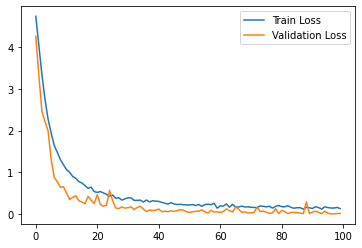

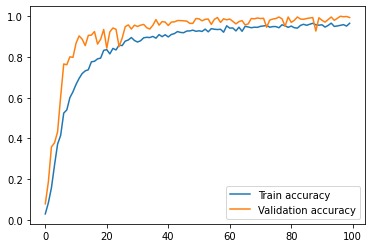

In [24]:
print(hist.history.keys())
plt.plot(hist.history["loss"],label = "Train Loss")
plt.plot(hist.history["val_loss"],label = "Validation Loss")
plt.legend()
plt.show()
plt.figure()
plt.plot(hist.history["accuracy"],label = "Train accuracy")
plt.plot(hist.history["val_accuracy"],label = "Validation accuracy")
plt.legend()
plt.show()

## Saving History

In [25]:
import json

with open("deneme.json","w") as f:
    json.dump(hist.history, f)

## Loading History

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


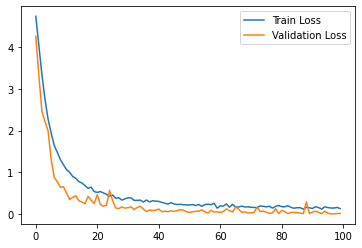

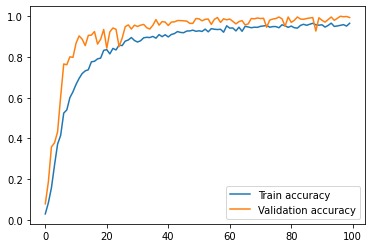

In [27]:
import codecs

with codecs.open("deneme.json","r",encoding="utf-8") as f:
    h = json.loads(f.read())

print(hist.history.keys())
plt.plot(h["loss"],label = "Train Loss")
plt.plot(h["val_loss"],label = "Validation Loss")
plt.legend()
plt.show()
plt.figure()
plt.plot(h["accuracy"],label = "Train accuracy")
plt.plot(h["val_accuracy"],label = "Validation accuracy")
plt.legend()
plt.show()